In [1]:
# import libraries for the project 
import numpy as np           
import seaborn as sns   
import pandas as pd                
import numpy as np                 
import matplotlib.pyplot as plt                          


In [3]:
# read and check data types
df = pd.read_csv('baby_activity_logs.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5715 entries, 0 to 5714
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   baby_activity    5715 non-null   object
 1   time             5715 non-null   object
 2   clock_system     5715 non-null   object
 3   parent_activity  5715 non-null   object
 4   status           5715 non-null   object
 5   unit             3494 non-null   object
 6   month            5715 non-null   object
 7   day              5715 non-null   int64 
 8   year             5715 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 402.0+ KB


In [4]:
df.head()

,baby_activity,time,clock_system,parent_activity,status,unit,month,day,year
0,Diaper,1:00,AM,change,Wet,NaN,February,12,2022
1,Feeding,1:00,AM,Formula,1.69,oz.,February,12,2022
2,Feeding,1:00,PM,Formula,0.5,oz.,March,20,2022
3,Diaper,1:00,PM,change,Wet,NaN,March,20,2022
4,Feeding,1:00,PM,Formula,2,oz.,March,23,2022


In [27]:
df['baby_activity'].unique()

array(['Diaper', 'Feeding', 'Sleep', 'Temperature', 'Milestone',
       'Activity', 'Joy'], dtype=object)

In [5]:
df.columns

Index(['baby_activity', 'time', 'clock_system', 'parent_activity', 'status',
       'unit', 'month', 'day', 'year'],
      dtype='object')

In [8]:
# explore feeding data
feeding = df[(df['baby_activity'] == 'Feeding') & (df['parent_activity'] == 'Formula')]
feeding.head()

,baby_activity,time,clock_system,parent_activity,status,unit,month,day,year
1,Feeding,1:00,AM,Formula,1.69,oz.,February,12,2022
2,Feeding,1:00,PM,Formula,0.5,oz.,March,20,2022
4,Feeding,1:00,PM,Formula,2,oz.,March,23,2022
8,Feeding,1:00,PM,Formula,2.7,oz.,July,27,2022
12,Feeding,1:01,PM,Formula,1,oz.,March,1,2022


In [9]:
feeding.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2934 entries, 1 to 5712
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   baby_activity    2934 non-null   object
 1   time             2934 non-null   object
 2   clock_system     2934 non-null   object
 3   parent_activity  2934 non-null   object
 4   status           2934 non-null   object
 5   unit             2934 non-null   object
 6   month            2934 non-null   object
 7   day              2934 non-null   int64 
 8   year             2934 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 229.2+ KB


In [10]:
feeding.shape

(2934, 9)

In [12]:
feeding['status'] = feeding['status'].astype('Float64')
feeding['time'] = pd.to_datetime(feeding['time'])

C:\Users\Owner\AppData\Local\Temp\ipykernel_10296\310619824.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feeding['status'] = feeding['status'].astype('Float64')
C:\Users\Owner\AppData\Local\Temp\ipykernel_10296\310619824.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  feeding['time'] = pd.to_datetime(feeding['time'])
C:\Users\Owner\AppData\Local\Temp\ipykernel_10296\310619824.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [13]:
feeding.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2934 entries, 1 to 5712
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   baby_activity    2934 non-null   object        
 1   time             2934 non-null   datetime64[ns]
 2   clock_system     2934 non-null   object        
 3   parent_activity  2934 non-null   object        
 4   status           2934 non-null   Float64       
 5   unit             2934 non-null   object        
 6   month            2934 non-null   object        
 7   day              2934 non-null   int64         
 8   year             2934 non-null   int64         
dtypes: Float64(1), datetime64[ns](1), int64(2), object(5)
memory usage: 232.1+ KB


In [16]:
feeding_rename = feeding.rename(columns={
    'status':'feeding_amount'
})

In [17]:
feeding_rename.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2934 entries, 1 to 5712
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   baby_activity    2934 non-null   object        
 1   time             2934 non-null   datetime64[ns]
 2   clock_system     2934 non-null   object        
 3   parent_activity  2934 non-null   object        
 4   feeding_amount   2934 non-null   Float64       
 5   unit             2934 non-null   object        
 6   month            2934 non-null   object        
 7   day              2934 non-null   int64         
 8   year             2934 non-null   int64         
dtypes: Float64(1), datetime64[ns](1), int64(2), object(5)
memory usage: 296.6+ KB


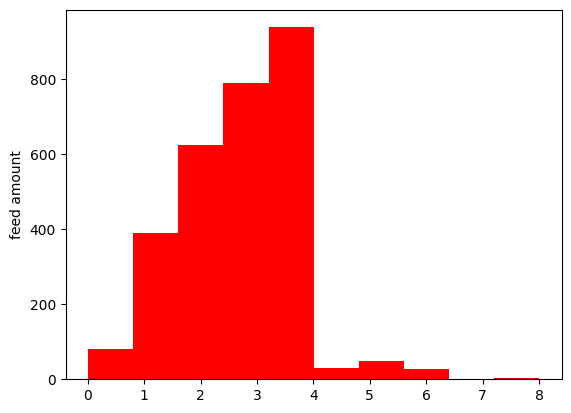

In [26]:
# visualize feeding amount 
feeding_rename['feeding_amount'].plot(kind='hist', 
                                      color="red",
                                      ylabel='feed amount')
plt.show()

-- look at the data again

In [28]:
df.head()

,baby_activity,time,clock_system,parent_activity,status,unit,month,day,year
0,Diaper,1:00,AM,change,Wet,NaN,February,12,2022
1,Feeding,1:00,AM,Formula,1.69,oz.,February,12,2022
2,Feeding,1:00,PM,Formula,0.5,oz.,March,20,2022
3,Diaper,1:00,PM,change,Wet,NaN,March,20,2022
4,Feeding,1:00,PM,Formula,2,oz.,March,23,2022


In [29]:
df['baby_activity'].unique()

array(['Diaper', 'Feeding', 'Sleep', 'Temperature', 'Milestone',
       'Activity', 'Joy'], dtype=object)

In [30]:
df['parent_activity'].unique()

array(['change', 'Formula', 'Slept', 'Banana', 'Apple', 'Nursing',
       'Started', 'Motrin', 'Blueberry', 'Chip', '102.4', 'Tries',
       'Cereal', 'Teething', 'Expressed', 'Butternut', '103.9', 'Oatmeal',
       'Apple,', 'Rice', 'Green', 'Sweet', '98.4', 'Strawberry,', 'Tummy',
       'Beach', 'Mango', 'Advil', 'Fruit', 'Cough', 'Jollof', 'Beachnut',
       'Water', 'Carrots', 'Food', 'First', 'Veggies', 'Whole', 'Toddler',
       'Peach', 'Cheerios', 'Eggs', '99.1', 'Strawberry', 'Spinach,',
       'Babbles', 'Laughs', 'Rolls', '100.5', '101.1'], dtype=object)

In [34]:
# create a new column that combines time columns
df['datetime_str'] =  df['month'] + " " + df['day'].astype(str) + " " + df['year'].astype(str) + " " + df['time'] + " " + df['clock_system']

# Convert to datetime object
df['datetime'] = pd.to_datetime(df['datetime_str'], format='%B %d %Y %I:%M %p')

# Sort by time
df = df.sort_values(by='datetime')

df.head()

,baby_activity,time,clock_system,parent_activity,status,unit,month,day,year,dt_str,datetime_str,datetime
5539,Diaper,12:37,PM,change,Wet,NaN,February,9,2022,February 9 2022 12:37 PM,February 9 2022 12:37 PM,2022-02-09 12:37:00
5614,Feeding,12:46,PM,Formula,0.3,oz.,February,9,2022,February 9 2022 12:46 PM,February 9 2022 12:46 PM,2022-02-09 12:46:00
63,Sleep,1:09,PM,Slept,21,hrs,February,9,2022,February 9 2022 1:09 PM,February 9 2022 1:09 PM,2022-02-09 13:09:00
1012,Feeding,3:30,PM,Formula,0.5,oz.,February,9,2022,February 9 2022 3:30 PM,February 9 2022 3:30 PM,2022-02-09 15:30:00
2185,Diaper,6:23,PM,change,Dry,NaN,February,9,2022,February 9 2022 6:23 PM,February 9 2022 6:23 PM,2022-02-09 18:23:00


In [37]:
col_list = list(df.columns)
col_list

['baby_activity',
 'time',
 'clock_system',
 'parent_activity',
 'status',
 'unit',
 'month',
 'day',
 'year',
 'dt_str',
 'datetime_str',
 'datetime']

In [40]:
clean_df = df[df['baby_activity'].isin(['Diaper', 'Feeding', 'Sleep'])]
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5699 entries, 5539 to 975
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   baby_activity    5699 non-null   object        
 1   time             5699 non-null   object        
 2   clock_system     5699 non-null   object        
 3   parent_activity  5699 non-null   object        
 4   status           5699 non-null   object        
 5   unit             3486 non-null   object        
 6   month            5699 non-null   object        
 7   day              5699 non-null   int64         
 8   year             5699 non-null   int64         
 9   dt_str           5699 non-null   object        
 10  datetime_str     5699 non-null   object        
 11  datetime         5699 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 578.8+ KB


In [ ]:
clean_df.head()

,baby_activity,time,clock_system,parent_activity,status,unit,month,day,year,dt_str,datetime_str,datetime
5539,Diaper,12:37,PM,change,Wet,NaN,February,9,2022,February 9 2022 12:37 PM,February 9 2022 12:37 PM,2022-02-09 12:37:00
5614,Feeding,12:46,PM,Formula,0.3,oz.,February,9,2022,February 9 2022 12:46 PM,February 9 2022 12:46 PM,2022-02-09 12:46:00
63,Sleep,1:09,PM,Slept,21,hrs,February,9,2022,February 9 2022 1:09 PM,February 9 2022 1:09 PM,2022-02-09 13:09:00
1012,Feeding,3:30,PM,Formula,0.5,oz.,February,9,2022,February 9 2022 3:30 PM,February 9 2022 3:30 PM,2022-02-09 15:30:00
2185,Diaper,6:23,PM,change,Dry,NaN,February,9,2022,February 9 2022 6:23 PM,February 9 2022 6:23 PM,2022-02-09 18:23:00


In [55]:
ss = clean_df[clean_df['baby_activity'] == 'Sleep'].loc[:,'status']

# ss.astype('Float64').plot(kind='hist')
ss.unique()

array(['21', '22', '1', '19', '10', '2', '9', '6', '3', '4', '16', '43',
       '5', '11', '38', '7', '8', 'sleeping', '29', '13', '24', '30',
       '32', '41', '15', '40', '12', '31', '18', '27', '14', '33', '58',
       '54', '49', '20', '34', '26', '39', '44', '25', '50', '36', '48',
       '46', '28', '57', '47'], dtype=object)

In [57]:
clean_df = clean_df[~(clean_df['status'] == 'sleeping')]
ads = clean_df[clean_df['baby_activity'] == 'Sleep'].loc[:,'status']

ads.unique()

array(['21', '22', '1', '19', '10', '2', '9', '6', '3', '4', '16', '43',
       '5', '11', '38', '7', '8', '29', '13', '24', '30', '32', '41',
       '15', '40', '12', '31', '18', '27', '14', '33', '58', '54', '49',
       '20', '34', '26', '39', '44', '25', '50', '36', '48', '46', '28',
       '57', '47'], dtype=object)

<Axes: ylabel='Frequency'>

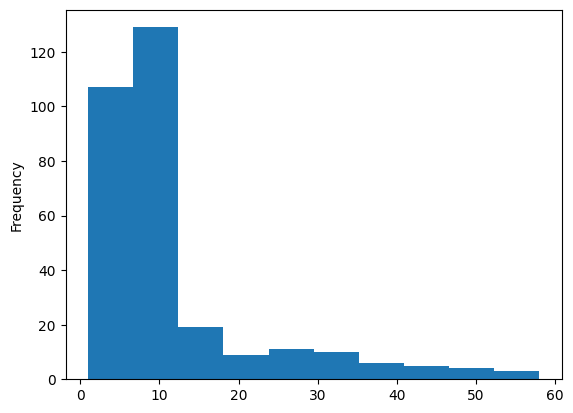

In [59]:
ads.astype('int').plot(kind='hist')

In [66]:
clean_df.head()

,baby_activity,time,clock_system,parent_activity,feeding_amount,unit,month,day,year,dt_str,datetime_str,datetime
5539,Diaper,12:37,PM,change,Wet,NaN,February,9,2022,February 9 2022 12:37 PM,February 9 2022 12:37 PM,2022-02-09 12:37:00
5614,Feeding,12:46,PM,Formula,0.3,oz.,February,9,2022,February 9 2022 12:46 PM,February 9 2022 12:46 PM,2022-02-09 12:46:00
63,Sleep,1:09,PM,Slept,21,hrs,February,9,2022,February 9 2022 1:09 PM,February 9 2022 1:09 PM,2022-02-09 13:09:00
1012,Feeding,3:30,PM,Formula,0.5,oz.,February,9,2022,February 9 2022 3:30 PM,February 9 2022 3:30 PM,2022-02-09 15:30:00
2185,Diaper,6:23,PM,change,Dry,NaN,February,9,2022,February 9 2022 6:23 PM,February 9 2022 6:23 PM,2022-02-09 18:23:00


In [69]:
# use clean df for analysis
clean_df1 = clean_df.rename(columns={
    'status':'activity_value'
})

clean_df1.head(3)

,baby_activity,time,clock_system,parent_activity,feeding_amount,unit,month,day,year,dt_str,datetime_str,datetime
5539,Diaper,12:37,PM,change,Wet,NaN,February,9,2022,February 9 2022 12:37 PM,February 9 2022 12:37 PM,2022-02-09 12:37:00
5614,Feeding,12:46,PM,Formula,0.3,oz.,February,9,2022,February 9 2022 12:46 PM,February 9 2022 12:46 PM,2022-02-09 12:46:00
63,Sleep,1:09,PM,Slept,21,hrs,February,9,2022,February 9 2022 1:09 PM,February 9 2022 1:09 PM,2022-02-09 13:09:00


In [71]:
clean_df1['parent_activity'].unique()

array(['change', 'Formula', 'Slept', 'Nursing', 'Expressed', 'Fruit',
       'Carrots', 'Cereal', 'Apple', 'Butternut', 'Advil', 'Water',
       'Beach', 'Apple,', 'Oatmeal', 'Cough', 'Veggies', 'Blueberry',
       'Banana', 'Beachnut', 'Sweet', 'Strawberry,', 'Mango', 'Motrin',
       'Teething', 'Peach', 'Spinach,', 'Eggs', 'Chip', 'Jollof', 'Rice',
       'Whole', 'Food', 'Strawberry', 'Toddler', 'Green', 'Cheerios'],
      dtype=object)

In [70]:
clean_df1['feeding_amount'].unique()

array(['Wet', '0.3', '21', '0.5', 'Dry', 'Mixed', 'Dirty', '0.32', '20',
       '10', '0.4', '22', '1', '19', '0.7', '0.8', '2', '1.9', '0.6',
       '0.9', '1.83', '9', '1.69', '2.02', '1.52', '0.25', '1.5', '1.4',
       '1.65', '1.01', '6', '1.18', '0.84', '1.35', '3', '2.53', '2.43',
       '1.8', '1.7', '4', '1.1', '1.49', '1.79', '0.81', '1.2', '16',
       '1.21', '2.3', '2.7', '2.5', '43', '2.6', '2.1', '5', '1.3', '2.2',
       '1.6', '11', '38', '7', '2.8', '0.01', '8', '29', '13', '24',
       '2.4', '30', '32', '41', '15', '3.4', '40', '12', '31', '18',
       '3.3', '3.5', '2.9', '3.2', '27', '3.13', '3.9', '3.1', '14',
       '3.7', '3.93', '3.6', '33', '58', '54', '49', '4.5', '5.4', '6.2',
       '3.8', '34', '4.4', '5.2', '4.7', '4.2', '4.9', '3.57', '26',
       '4.1', 'pur?', '39', '5.8', '44', '5.3', '25', '50', '36', '48',
       'squash', '46', '5.5', '28', '1.25', '57', '7.5', 'Nut', 'nut',
       '4.8', 'Pear', '47', 'Syrup', 'and', 'banana', 'sauce',
       'bl

# FEED ONLY DATA

In [147]:
feed_only = clean_df1[(clean_df1['baby_activity'] == 'Feeding') & (clean_df1['parent_activity'] =='Formula')]

feed_only.head()

,baby_activity,time,clock_system,parent_activity,feeding_amount,unit,month,day,year,dt_str,datetime_str,datetime
5614,Feeding,12:46,PM,Formula,0.3,oz.,February,9,2022,February 9 2022 12:46 PM,February 9 2022 12:46 PM,2022-02-09 12:46:00
1012,Feeding,3:30,PM,Formula,0.5,oz.,February,9,2022,February 9 2022 3:30 PM,February 9 2022 3:30 PM,2022-02-09 15:30:00
2409,Feeding,6:48,PM,Formula,0.5,oz.,February,9,2022,February 9 2022 6:48 PM,February 9 2022 6:48 PM,2022-02-09 18:48:00
3783,Feeding,9:30,PM,Formula,0.5,oz.,February,9,2022,February 9 2022 9:30 PM,February 9 2022 9:30 PM,2022-02-09 21:30:00
5492,Feeding,12:30,AM,Formula,0.5,oz.,February,10,2022,February 10 2022 12:30 AM,February 10 2022 12:30 AM,2022-02-10 00:30:00


In [148]:
feed_only.shape

(2934, 12)

In [149]:
feed_only.dtypes

baby_activity              object
time                       object
clock_system               object
parent_activity            object
feeding_amount             object
unit                       object
month                      object
day                         int64
year                        int64
dt_str                     object
datetime_str               object
datetime           datetime64[ns]
dtype: object

In [150]:
# convert datetime to values important
def convert_time (data_with_time):
    column_names = data_with_time.select_dtypes(include='datetime64').columns
    column = data_with_time[column_names[0]]
    # data_with_time['hour'] = data_with_time['datetime'].dt.hour
    # data_with_time['dayofweek'] = data_with_time['datetime'].dt.dayofweek
    # data_with_time['minutes_since_midnight'] = data_with_time['hour']*60 + data_with_time['datetime'].dt.minute

    data_with_time['hour'] = column.dt.hour
    data_with_time['dayofweek'] = column.dt.dayofweek
    data_with_time['minutes_since_midnight'] = column.dt.hour*60 + column.dt.minute    
    
    return data_with_time


new_feed = convert_time(feed_only)
new_feed.head(3)

C:\Users\Owner\AppData\Local\Temp\ipykernel_10296\1598756070.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_with_time['hour'] = column.dt.hour
C:\Users\Owner\AppData\Local\Temp\ipykernel_10296\1598756070.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_with_time['dayofweek'] = column.dt.dayofweek
C:\Users\Owner\AppData\Local\Temp\ipykernel_10296\1598756070.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

,baby_activity,time,clock_system,parent_activity,feeding_amount,unit,month,day,year,dt_str,datetime_str,datetime,hour,dayofweek,minutes_since_midnight
5614,Feeding,12:46,PM,Formula,0.3,oz.,February,9,2022,February 9 2022 12:46 PM,February 9 2022 12:46 PM,2022-02-09 12:46:00,12,2,766
1012,Feeding,3:30,PM,Formula,0.5,oz.,February,9,2022,February 9 2022 3:30 PM,February 9 2022 3:30 PM,2022-02-09 15:30:00,15,2,930
2409,Feeding,6:48,PM,Formula,0.5,oz.,February,9,2022,February 9 2022 6:48 PM,February 9 2022 6:48 PM,2022-02-09 18:48:00,18,2,1128


C:\Users\Owner\AppData\Local\Temp\ipykernel_10296\175727920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_feed['feeding_amount'] = new_feed['feeding_amount'].astype('float64')


<Axes: ylabel='Frequency'>

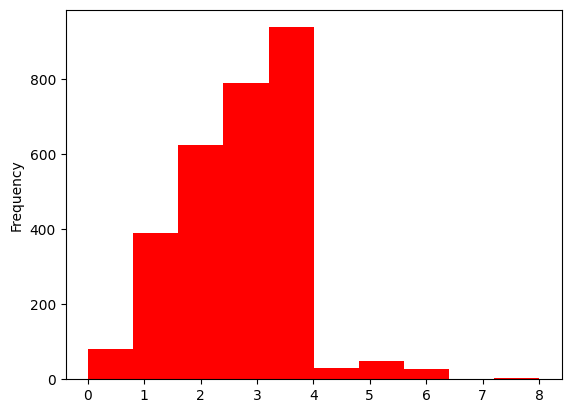

In [151]:
new_feed['feeding_amount'] = new_feed['feeding_amount'].astype('float64')
new_feed['feeding_amount'].plot(kind='hist', color='red')

In [152]:
new_feed.head()

,baby_activity,time,clock_system,parent_activity,feeding_amount,unit,month,day,year,dt_str,datetime_str,datetime,hour,dayofweek,minutes_since_midnight
5614,Feeding,12:46,PM,Formula,0.3,oz.,February,9,2022,February 9 2022 12:46 PM,February 9 2022 12:46 PM,2022-02-09 12:46:00,12,2,766
1012,Feeding,3:30,PM,Formula,0.5,oz.,February,9,2022,February 9 2022 3:30 PM,February 9 2022 3:30 PM,2022-02-09 15:30:00,15,2,930
2409,Feeding,6:48,PM,Formula,0.5,oz.,February,9,2022,February 9 2022 6:48 PM,February 9 2022 6:48 PM,2022-02-09 18:48:00,18,2,1128
3783,Feeding,9:30,PM,Formula,0.5,oz.,February,9,2022,February 9 2022 9:30 PM,February 9 2022 9:30 PM,2022-02-09 21:30:00,21,2,1290
5492,Feeding,12:30,AM,Formula,0.5,oz.,February,10,2022,February 10 2022 12:30 AM,February 10 2022 12:30 AM,2022-02-10 00:30:00,0,3,30


In [154]:
new_feed = new_feed[new_feed['year'] == 2022]
new_feed.shape

(2643, 15)

<Axes: ylabel='Frequency'>

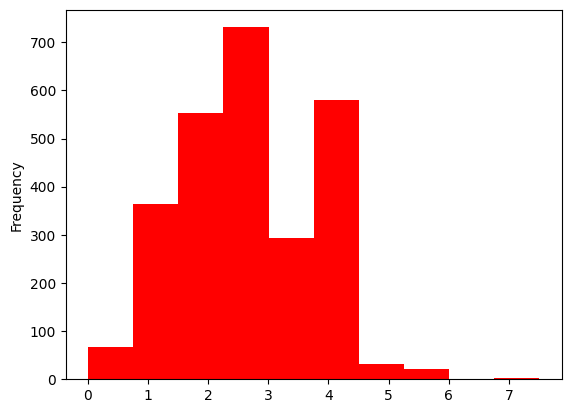

In [160]:
new_feed['feeding_amount'].plot(kind='hist', bins=10,color='red')

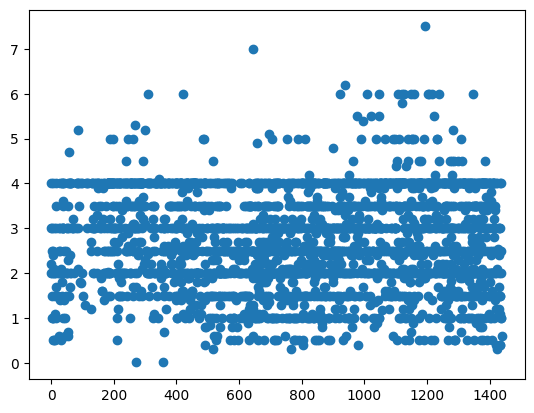

In [162]:
plt.scatter(new_feed['minutes_since_midnight'], new_feed['feeding_amount'])
plt.show()

C:\Users\Owner\AppData\Local\Temp\ipykernel_10296\1305302059.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_feed['month'] = pd.Categorical(new_feed['month'], categories=month_order, ordered=True)
C:\Users\Owner\AppData\Local\Temp\ipykernel_10296\1305302059.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_feed = new_feed.groupby('month')['feeding_amount'].mean().sort_index()


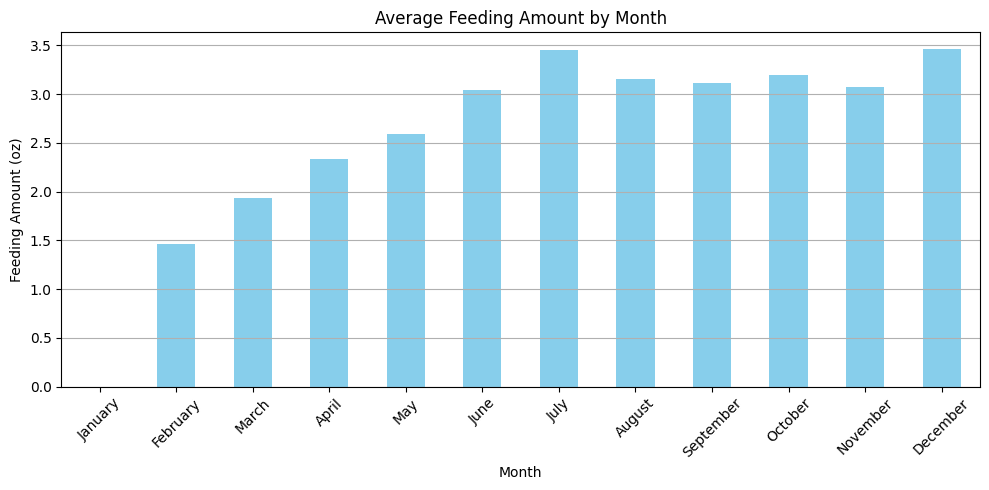

In [165]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the proper month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Convert to categorical type with ordered categories
new_feed['month'] = pd.Categorical(new_feed['month'], categories=month_order, ordered=True)

# Group and sort by month order
group_feed = new_feed.groupby('month')['feeding_amount'].mean().sort_index()

# Plot
group_feed.plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.title('Average Feeding Amount by Month')
plt.ylabel('Feeding Amount (oz)')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


C:\Users\Owner\AppData\Local\Temp\ipykernel_10296\3661858352.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=new_feed, x='month', y='feeding_amount', order=month_order, showfliers=False, palette='pastel')


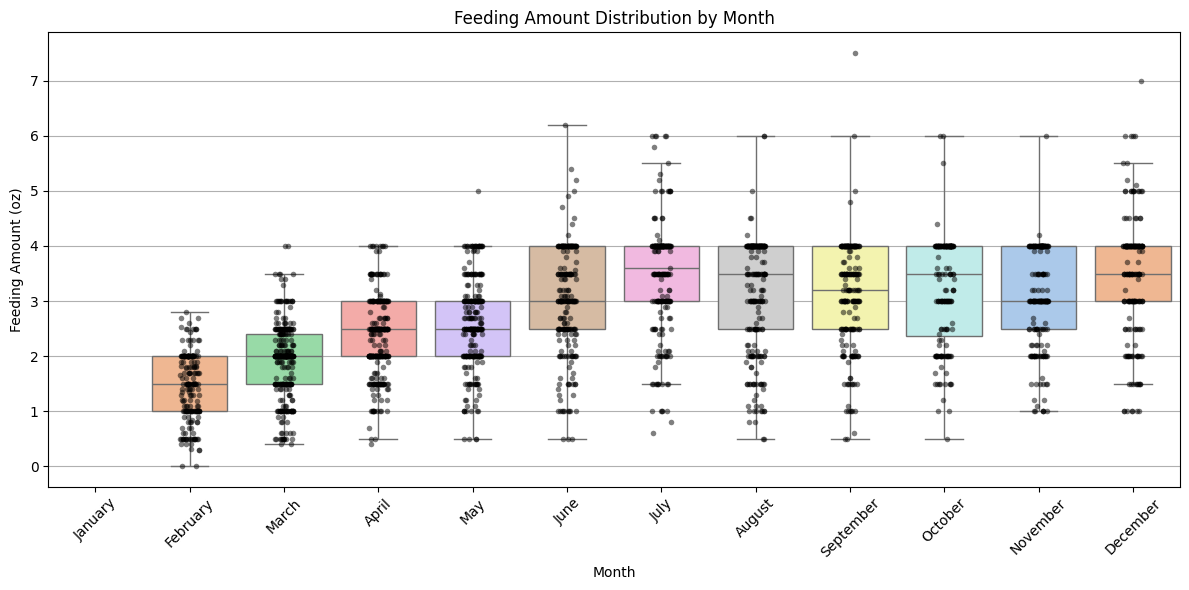

In [166]:
plt.figure(figsize=(12, 6))

# Boxplot
sns.boxplot(data=new_feed, x='month', y='feeding_amount', order=month_order, showfliers=False, palette='pastel')

# Jittered data points (stripplot)
sns.stripplot(data=new_feed, x='month', y='feeding_amount', order=month_order,
              color='black', size=4, jitter=True, alpha=0.5)

plt.title('Feeding Amount Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Feeding Amount (oz)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [215]:
# fliter new feed
new_feed_m = new_feed[(new_feed['month'] >= "March") & (new_feed['month'] <= "May") ]
new_feed_m = new_feed_m[new_feed_m['feeding_amount'] <= 5]


In [216]:
new_feed_m['month'].unique()

month_order = ['March', 'April','May']

# Convert to categorical type with ordered categories
new_feed_m['month'] = pd.Categorical(new_feed_m['month'], categories=month_order, ordered=True)

C:\Users\Owner\AppData\Local\Temp\ipykernel_10296\1621173092.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=new_feed_m, x='month', y='feeding_amount', order=month_order, showfliers=False, palette='pastel')


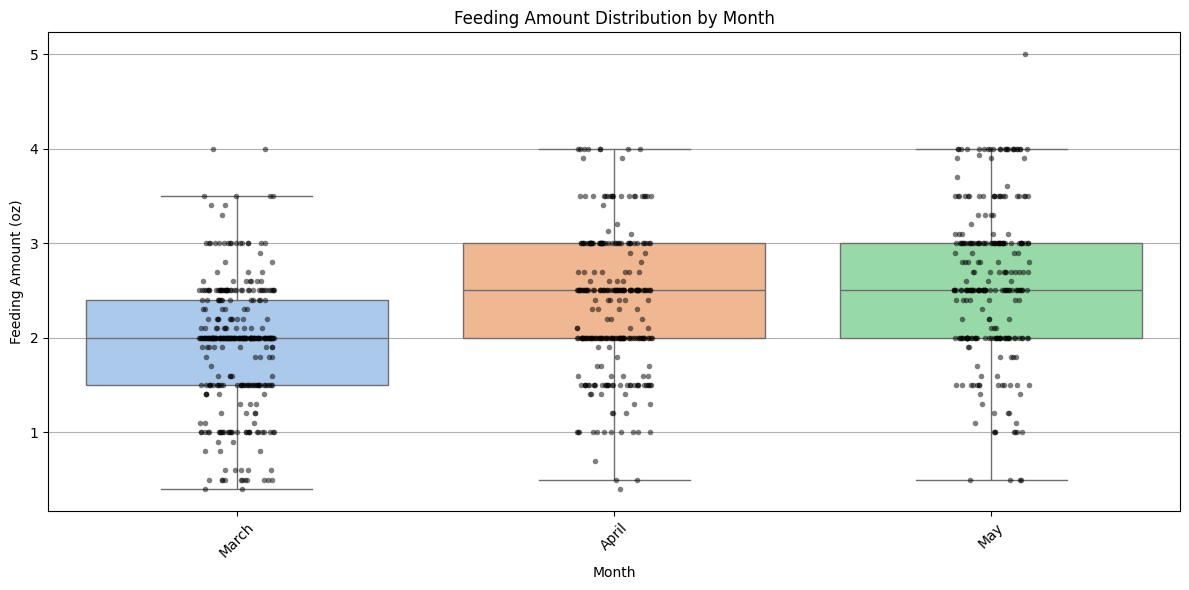

In [217]:
plt.figure(figsize=(12, 6))

# Boxplot
sns.boxplot(data=new_feed_m, x='month', y='feeding_amount', order=month_order, showfliers=False, palette='pastel')

# Jittered data points (stripplot)
sns.stripplot(data=new_feed_m, x='month', y='feeding_amount', order=month_order,
              color='black', size=4, jitter=True, alpha=0.5)

plt.title('Feeding Amount Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Feeding Amount (oz)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

C:\Users\Owner\AppData\Local\Temp\ipykernel_10296\2706599172.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=new_feed_am, x='month', y='feeding_amount', order=month_order, showfliers=False, palette='pastel')


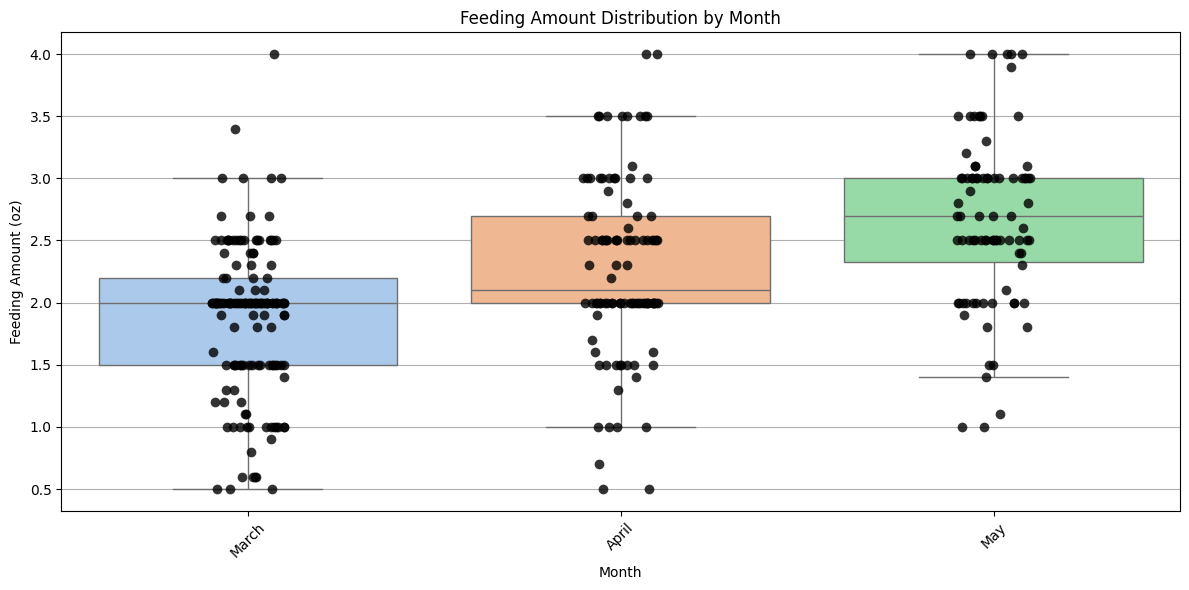

In [419]:
new_feed_am = new_feed_m[new_feed_m['clock_system'] == 'AM']
# new_feed_am.head(3)

plt.figure(figsize=(12, 6))

# Boxplot
sns.boxplot(data=new_feed_am, x='month', y='feeding_amount', order=month_order, showfliers=False, palette='pastel')

# Jittered data points (stripplot)
sns.stripplot(data=new_feed_am, x='month', y='feeding_amount', order=month_order,
              color='black', size=7, jitter=True, alpha=0.8)

plt.title('Feeding Amount Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Feeding Amount (oz)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<Axes: xlabel='clock_system', ylabel='count'>

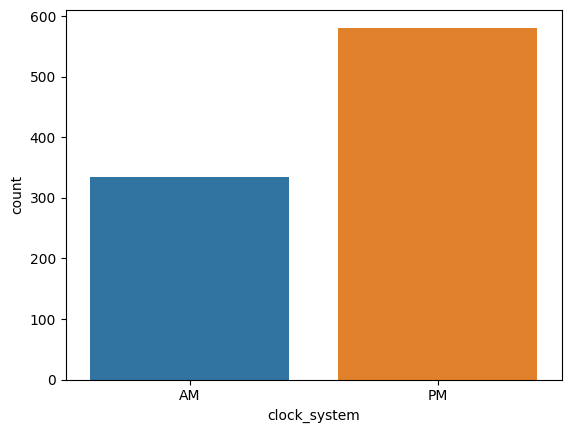

In [ ]:
sns.countplot(data=new_feed_m, x='clock_system', hue='clock_system')


C:\Users\Owner\AppData\Local\Temp\ipykernel_10296\3759920698.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=new_feed_pm, x='month', y='feeding_amount',


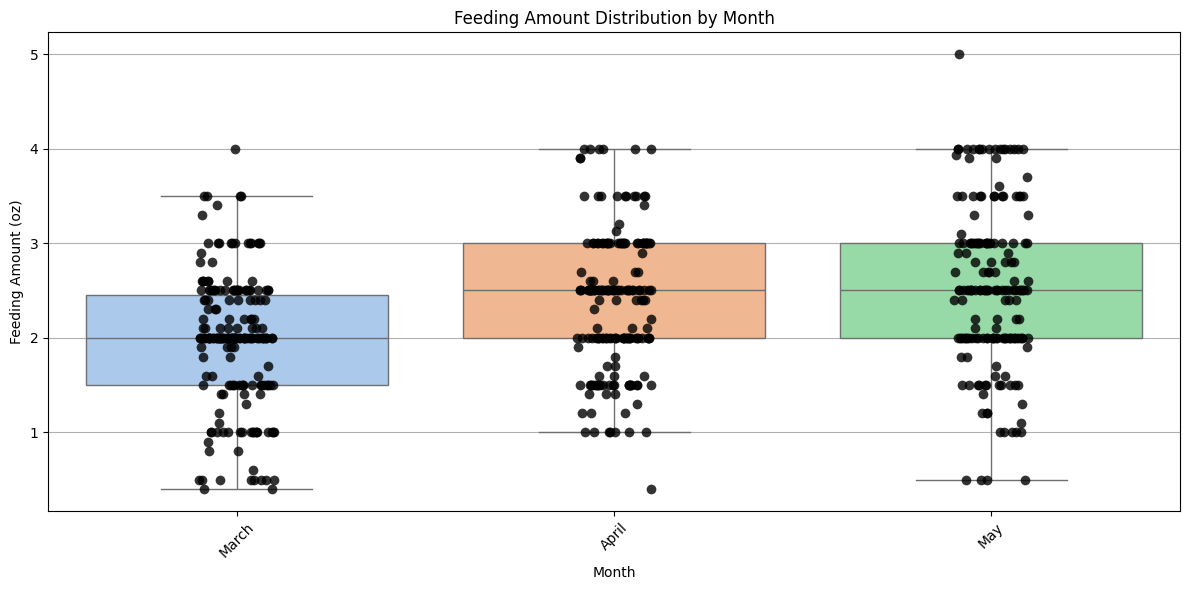

In [418]:
new_feed_pm = new_feed_m[new_feed_m['clock_system'] == 'PM']
# new_feed_am.head(3)

plt.figure(figsize=(12, 6))

# Boxplot
sns.boxplot(data=new_feed_pm, x='month', y='feeding_amount', 
            order=month_order, showfliers=False, palette='pastel')

# Jittered data points (stripplot)
sns.stripplot(data=new_feed_pm, x='month', y='feeding_amount', order=month_order,
              color='black', size=7, jitter=True, alpha=0.8)

plt.title('Feeding Amount Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Feeding Amount (oz)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [218]:
new_feed_m.head()

,baby_activity,time,clock_system,parent_activity,feeding_amount,unit,month,day,year,dt_str,datetime_str,datetime,hour,dayofweek,minutes_since_midnight
662,Feeding,2:41,AM,Formula,1.6,oz.,March,1,2022,March 1 2022 2:41 AM,March 1 2022 2:41 AM,2022-03-01 02:41:00,2,1,161
1864,Feeding,5:33,AM,Formula,2.5,oz.,March,1,2022,March 1 2022 5:33 AM,March 1 2022 5:33 AM,2022-03-01 05:33:00,5,1,333
2750,Feeding,7:24,AM,Formula,1.2,oz.,March,1,2022,March 1 2022 7:24 AM,March 1 2022 7:24 AM,2022-03-01 07:24:00,7,1,444
3801,Feeding,9:31,AM,Formula,2.0,oz.,March,1,2022,March 1 2022 9:31 AM,March 1 2022 9:31 AM,2022-03-01 09:31:00,9,1,571
4897,Feeding,11:20,AM,Formula,2.7,oz.,March,1,2022,March 1 2022 11:20 AM,March 1 2022 11:20 AM,2022-03-01 11:20:00,11,1,680


In [219]:
new_feed_m['time_diff_min'] = new_feed_m['datetime'].diff().dt.total_seconds() / 60
new_feed_m = new_feed_m.dropna()


In [220]:
new_feed_m.head(3)

,baby_activity,time,clock_system,parent_activity,feeding_amount,unit,month,day,year,dt_str,datetime_str,datetime,hour,dayofweek,minutes_since_midnight,time_diff_min
1864,Feeding,5:33,AM,Formula,2.5,oz.,March,1,2022,March 1 2022 5:33 AM,March 1 2022 5:33 AM,2022-03-01 05:33:00,5,1,333,172.0
2750,Feeding,7:24,AM,Formula,1.2,oz.,March,1,2022,March 1 2022 7:24 AM,March 1 2022 7:24 AM,2022-03-01 07:24:00,7,1,444,111.0
3801,Feeding,9:31,AM,Formula,2.0,oz.,March,1,2022,March 1 2022 9:31 AM,March 1 2022 9:31 AM,2022-03-01 09:31:00,9,1,571,127.0


In [221]:
new_feed_m.shape

(936, 16)

In [224]:
new_feed_m.info()

<class 'pandas.core.frame.DataFrame'>
Index: 936 entries, 1864 to 3744
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   baby_activity           936 non-null    object        
 1   time                    936 non-null    object        
 2   clock_system            936 non-null    object        
 3   parent_activity         936 non-null    object        
 4   feeding_amount          936 non-null    float64       
 5   unit                    936 non-null    object        
 6   month                   936 non-null    category      
 7   day                     936 non-null    int64         
 8   year                    936 non-null    int64         
 9   dt_str                  936 non-null    object        
 10  datetime_str            936 non-null    object        
 11  datetime                936 non-null    datetime64[ns]
 12  hour                    936 non-null    int32      

<Axes: ylabel='Frequency'>

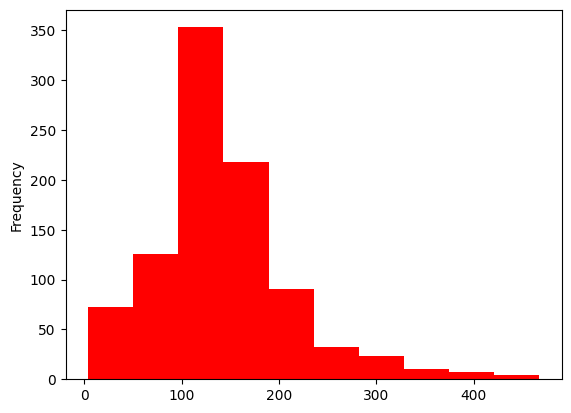

In [225]:
new_feed_m['time_diff_min'].plot(kind='hist', color='red')

In [226]:
new_feed_m= new_feed_m[new_feed_m['time_diff_min'] < new_feed_m['time_diff_min'].quantile(0.99)]


new_feed_m = new_feed_m[new_feed_m['time_diff_min'] < new_feed_m['time_diff_min'].quantile(0.99)]

<Axes: ylabel='Frequency'>

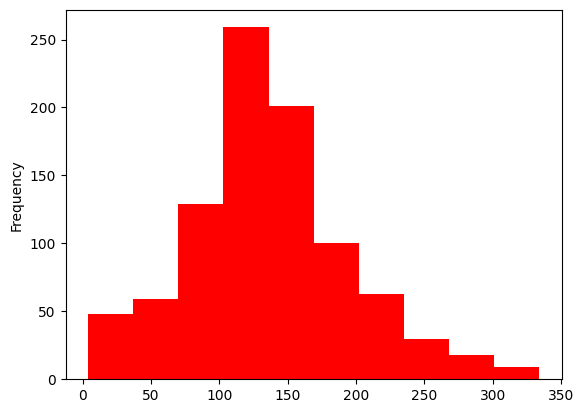

In [227]:
new_feed_m['time_diff_min'].plot(kind='hist', color='red')

In [409]:
new_feed_m.head(1)

,baby_activity,time,clock_system,parent_activity,feeding_amount,unit,month,day,year,dt_str,datetime_str,datetime,hour,dayofweek,minutes_since_midnight,time_diff_min
1864,Feeding,5:33,AM,Formula,2.5,oz.,March,1,2022,March 1 2022 5:33 AM,March 1 2022 5:33 AM,2022-03-01 05:33:00,5,1,333,172.0


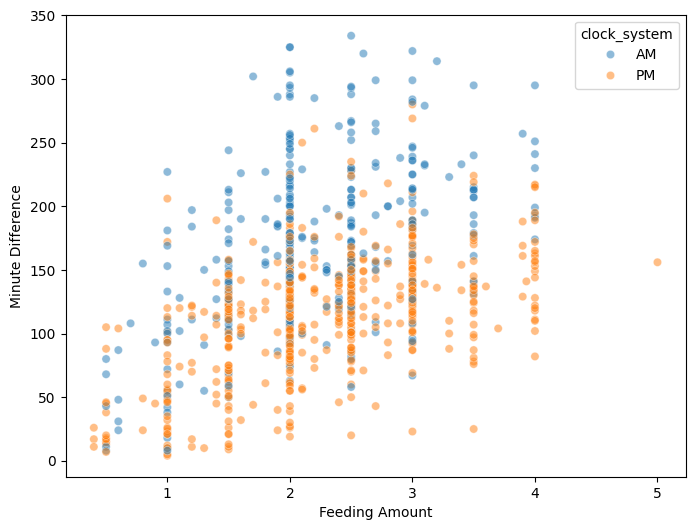

In [411]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='feeding_amount', y='time_diff_min', data=new_feed_m, hue= 'clock_system', alpha=0.5)
plt.xlabel('Feeding Amount')
plt.ylabel('Minute Difference')
plt.show()

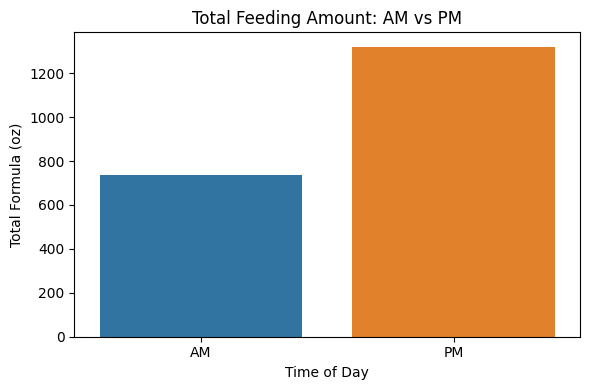

In [422]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assume column 'clock_system' contains 'AM' or 'PM'
am_pm_group = new_feed_m.groupby('clock_system')['feeding_amount'].sum().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(data=am_pm_group, x='clock_system', y='feeding_amount', hue='clock_system')
plt.title('Total Feeding Amount: AM vs PM')
plt.ylabel('Total Formula (oz)')
plt.xlabel('Time of Day')
plt.tight_layout()
plt.show()


## Deep Learning 

In [228]:
new_feed_m.columns

Index(['baby_activity', 'time', 'clock_system', 'parent_activity',
       'feeding_amount', 'unit', 'month', 'day', 'year', 'dt_str',
       'datetime_str', 'datetime', 'hour', 'dayofweek',
       'minutes_since_midnight', 'time_diff_min'],
      dtype='object')

In [374]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
selected_data = new_feed_m[[

                        # 'time_diff_min',
                        'feeding_amount', 
                         'hour', 
                         'dayofweek',
                         'minutes_since_midnight',
                        'time_diff_min',
                        # 'feeding_amount',
                        ]]

scaled_features = scaler.fit_transform(selected_data)

# create data sequence 
def create_sequences(data, seq_len=2):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i+seq_len, :3])  # feeding_amount, hour, dayofweek
        y.append(data[i+seq_len, 4])     # time_diff_min
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_features, seq_len=3)

In [440]:
# Install TensorFlow if not already installed
# %pip install tensorflow

# Train-test split
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)



# Build LSTM model
model = Sequential([
    LSTM(64,  return_sequences=True, input_shape=(X.shape[1], X.shape[2])),
    LSTM(64, return_sequences=True),
    LSTM(64),
    Dense(1)
])

# model = Sequential()
# model.add(LSTM(units=128, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
# model.add(Dropout(0.2))
# model.add(LSTM(units=128))
# model.add(Dropout(0.2))

# model.add(Dense(1))

early_stop = EarlyStopping(
    monitor='val_loss',          # Monitor validation loss
    patience=25,                  # Stop after 5 epochs with no improvement
    restore_best_weights=True    # Roll back to best weights after stopping
)

#
# model.compile(optimizer='adam', loss='mean_squared_error')
model.compile(optimizer='adam', loss='huber', metrics=['mae'])

history = model.fit(X_train, 
                    y_train, 
                    validation_data=(X_val, y_val), 
                    epochs=250, 
                    batch_size=8, 
                    callbacks = [early_stop],
                    verbose=1)


Epoch 1/250
92/92 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - loss: 0.0432 - mae: 0.2301 - val_loss: 0.0193 - val_mae: 0.1482
Epoch 2/250
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0151 - mae: 0.1336 - val_loss: 0.0170 - val_mae: 0.1377
Epoch 3/250
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0150 - mae: 0.1296 - val_loss: 0.0184 - val_mae: 0.1488
Epoch 4/250
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0157 - mae: 0.1377 - val_loss: 0.0169 - val_mae: 0.1392
Epoch 5/250
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0157 - mae: 0.1341 - val_loss: 0.0182 - val_mae: 0.1436
Epoch 6/250
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0167 - mae: 0.1401 - val_loss: 0.0168 - val_mae: 0.1368
Epoch 7/250
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0159 - mae: 0.1361 - val_loss: 0.0186 - val_mae: 0.1504
Epoch 8/250
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0177 - mae: 0.1431 - val_loss: 0.0181 - val_mae: 0.1428
Epoch 9/250
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.01

<Axes: title={'center': 'Loss vs Epochs'}, xlabel='Epochs', ylabel='Loss'>

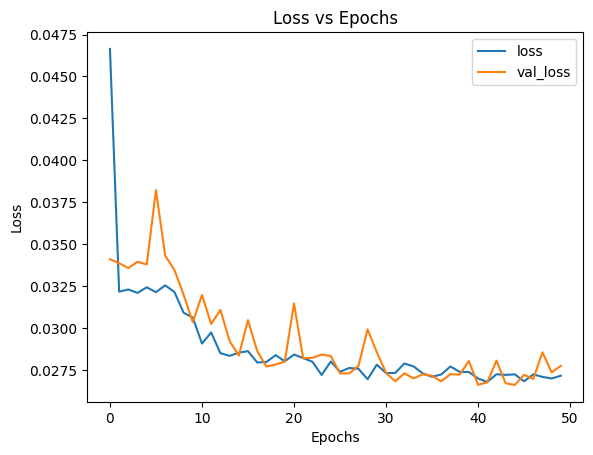

In [437]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(title='Loss vs Epochs',
             xlabel='Epochs',
             ylabel='Loss',
             )

In [434]:
y_pred = model.predict(X_val)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step


In [435]:
# Inverse scale to get actual minutes
def invert_scale(y_scaled, scaler, feature_index=3):
    dummy = np.zeros((len(y_scaled), 5))
    dummy[:, feature_index] = y_scaled.ravel()
    return scaler.inverse_transform(dummy)[:, feature_index]


y_pred_minutes = invert_scale(y_pred, scaler)
y_val_minutes = invert_scale(y_val.reshape(-1, 1), scaler)

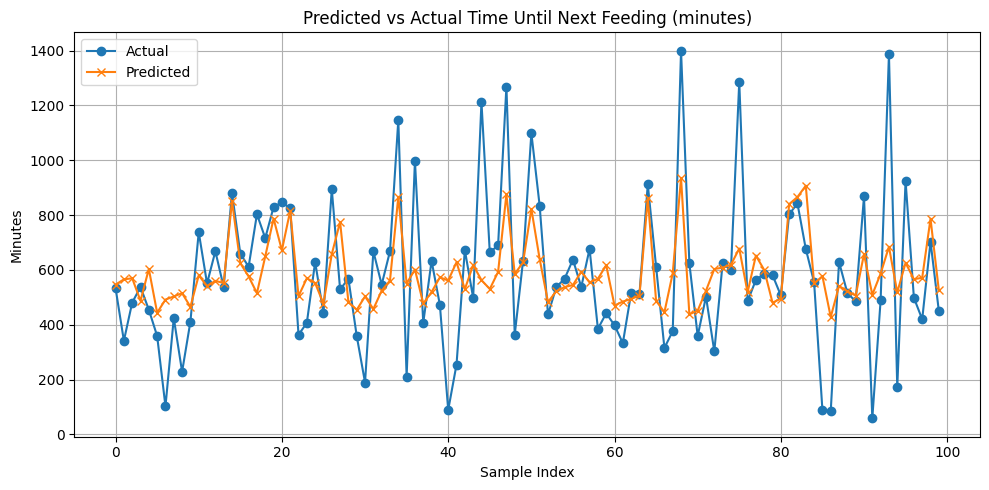

In [436]:
# Plot
plt.figure(figsize=(10, 5))
plt.plot(y_val_minutes[:100], label='Actual', marker='o')
plt.plot(y_pred_minutes[:100], label='Predicted', marker='x')
plt.title('Predicted vs Actual Time Until Next Feeding (minutes)')
plt.xlabel('Sample Index')
plt.ylabel('Minutes')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

MAE: 173.53 min, MSE: 55621.87 min


C:\Users\Owner\AppData\Local\Temp\ipykernel_10296\194504854.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


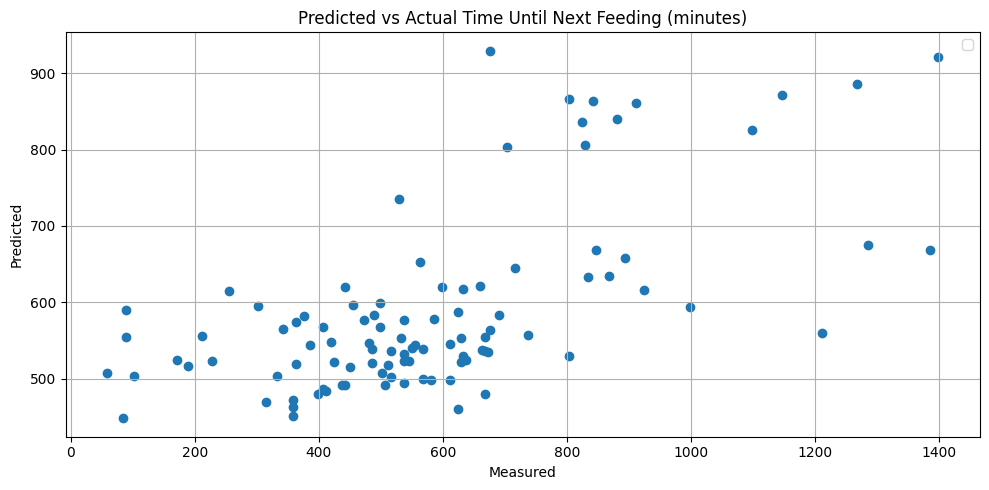

In [380]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_val_minutes, y_pred_minutes)
mse = mean_squared_error(y_val_minutes, y_pred_minutes)
print(f"MAE: {mae:.2f} min, MSE: {mse:.2f} min")

# Plot
plt.figure(figsize=(10, 5))
plt.scatter(y_val_minutes[:100],y_pred_minutes[:100])
# plt.plot(y_pred_minutes[:100], label='Predicted', marker='x')
plt.title('Predicted vs Actual Time Until Next Feeding (minutes)')
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Deep Learning with AM and PM data

In [ ]:
# filter the data by PM and AM 


In [110]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(64, input_shape=(X.shape[1], X.shape[2])),
    Dense(1)  # predicting feeding amount
])

model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=20, batch_size=16)


c:\Users\Owner\juggle_ds\juggle_ds\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 139436.7969
Epoch 2/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 75134.5781
Epoch 3/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 212585.0781
Epoch 4/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 110322.1641
Epoch 5/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 61628.8398
Epoch 6/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 70943.6875
Epoch 7/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 189096.9844
Epoch 8/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 57976.0625
Epoch 9/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 90864.6719
Epoch 10/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 150916.3750
Epoch 11/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 69274.2969
Epoch 12/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 105807.3594
Epoch 13/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 90034.6016
Epoch 14/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 121422